<h3>Functional Transformation</h3>

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=0,test_size=0.2)

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_14996\85839626.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


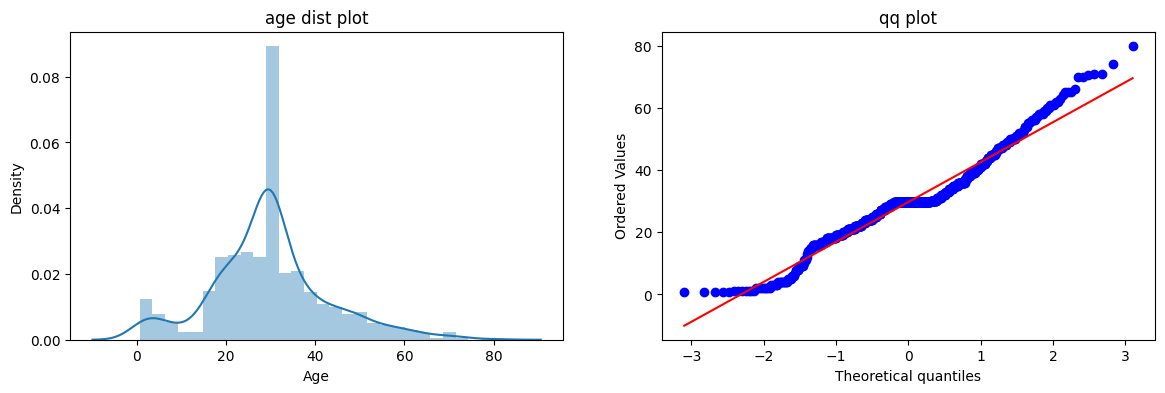

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("age dist plot")

plt.subplot(122)
stats.probplot(X_train["Age"],dist = "norm",plot=plt)
plt.title("qq plot")

plt.show()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_14996\3587862837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


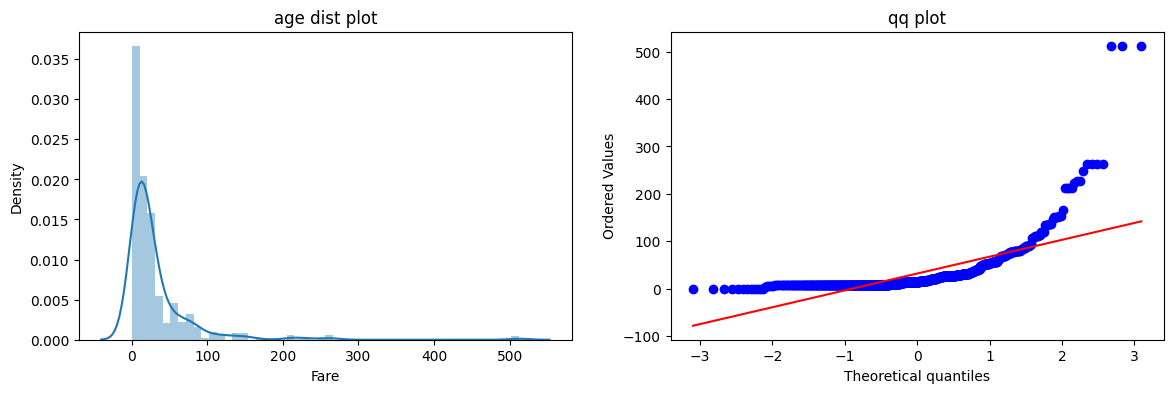

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("age dist plot")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist = "norm",plot=plt)
plt.title("qq plot")

plt.show()

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("accuracy score 1 ",accuracy_score(y_pred,y_test))
print("accuracy score 2 ",accuracy_score(y_pred1,y_test))


accuracy score 1  0.6983240223463687
accuracy score 2  0.6759776536312849


In [19]:
trf = FunctionTransformer(func = np.log1p)

In [20]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred = clf.predict(X_test_transform)
y_pred1 = clf2.predict(X_test_transform)

print("accuracy score 1 ",accuracy_score(y_pred,y_test))
print("accuracy score 2 ",accuracy_score(y_pred1,y_test))



accuracy score 1  0.7039106145251397
accuracy score 2  0.664804469273743


C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_14996\412224583.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform["Fare"])


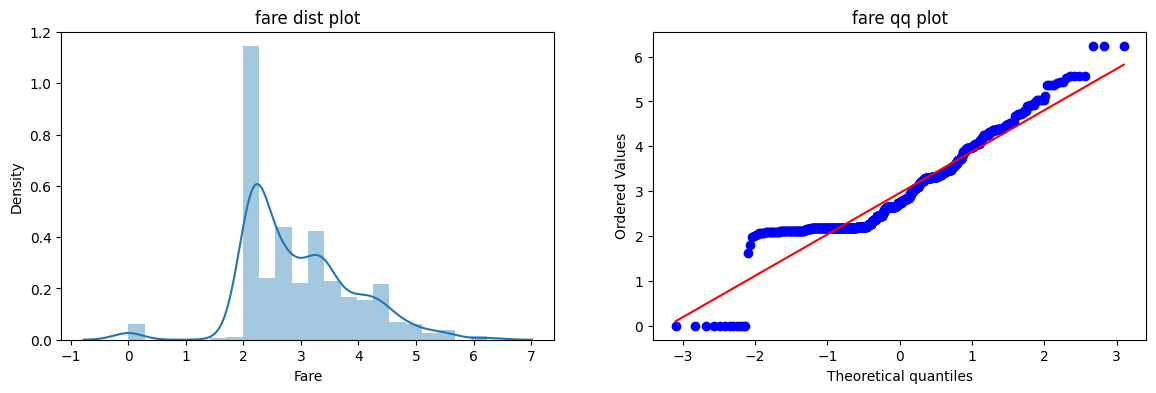

In [25]:
# we can see the difference in results in logistic regression but not in DecisionTreeClassifier
# because decisiontree classifier does not affected by distribution of data
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transform["Fare"])
plt.title("fare dist plot")

plt.subplot(122)
stats.probplot(X_train_transform["Fare"],dist = "norm",plot=plt)
plt.title("fare qq plot")

plt.show()

C:\Users\HEET BHATT\AppData\Local\Temp\ipykernel_14996\1593924200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform["Age"])


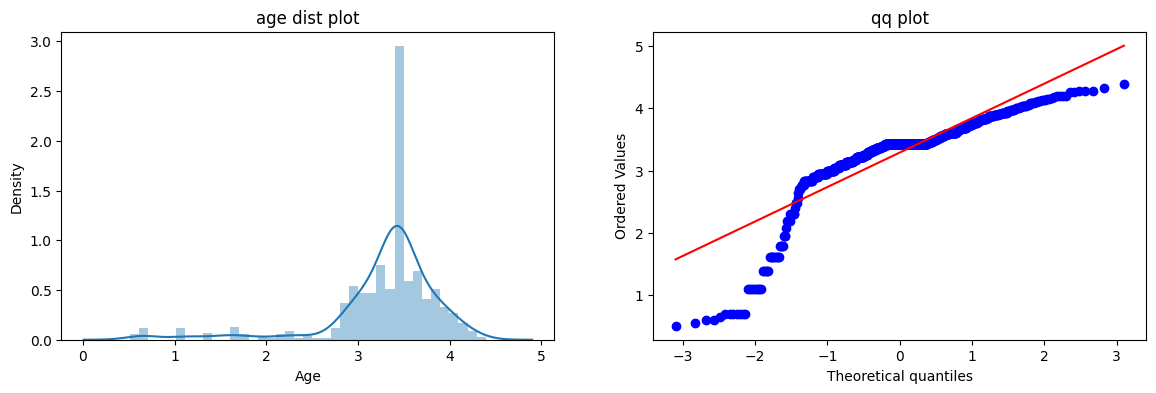

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transform["Age"])
plt.title("age dist plot")

plt.subplot(122)
stats.probplot(X_train_transform["Age"],dist = "norm",plot=plt)
plt.title("qq plot")

plt.show()